In [1]:
import os
import sys
import numpy as np
import pandas as pd
import music21
import pickle

from matplotlib import pyplot as plt
from music21 import *

# Data collection

We will use data from [Project Mutopia](https://www.mutopiaproject.org/), which contains 2 124 publicly available compositions in MIDI (Musical Instrument Digital Interface) format. As it is possible to filter compositions based on instruments, we will use a simple python script to collect all guitar compositions. Before collecting the data, we check the [robots.txt](https://www.mutopiaproject.org/robots.txt) file to know how to automate the interaction with the site.
This file contains the following lines:

    #www.robotstxt.org/

    #Allow crawling of all content
    User-agent: *
    Disallow:

The first line indicates that the rule that follows applies to all users who interact with the site. <br>
The second line means that there is no restriction on scraping.

In [2]:
#!python scripts/fetch_data.py

All downloaded .mid files are located in the _datasets_ directory

In [3]:
src_dir = './datasets/'
song_list = os.listdir(src_dir)

In [4]:
len(song_list)

389

For example, we convert the first file to a stream object to get to the notes.

In [5]:
first_stream = converter.parse(src_dir + song_list[0])

To see what is in the stream and what its offset is, we call the __show('text')__ above that stream. We read the offset in {} in front of the note. __Offset__ is (roughly) the length of time from the start of the piece. We should be careful, offset is not the same as duration. Duration is the time the note is held. The offset of a note will only be the sum of the previous durations if there are no rests (silences) in the piece and there are no cases where two notes sound together.

In [6]:
first_stream.show('text')

{0.0} <music21.stream.Part 0x7f2f982e3e80>
    {0.0} <music21.instrument.Instrument 'Guitar:lowerVoice: '>
    {0.0} <music21.instrument.AcousticGuitar 'Acoustic Guitar'>
    {0.0} <music21.instrument.AcousticGuitar 'Acoustic Guitar'>
    {0.0} <music21.instrument.AcousticGuitar 'acoustic guitar (nylon)'>
    {0.0} <music21.tempo.MetronomeMark Quarter=96.0>
    {0.0} <music21.key.Key of G major>
    {0.0} <music21.meter.TimeSignature 6/8>
    {0.0} <music21.note.Note G>
    {0.25} <music21.note.Note G>
    {0.5} <music21.note.Note B>
    {0.75} <music21.note.Note D>
    {1.0} <music21.note.Note B>
    {1.25} <music21.note.Note G>
    {1.5} <music21.note.Note G>
    {1.75} <music21.note.Note F#>
    {2.0} <music21.note.Note C>
    {2.25} <music21.note.Note D>
    {2.5} <music21.note.Note C>
    {2.75} <music21.note.Note F#>
    {3.0} <music21.note.Note B>
    {3.25} <music21.note.Note D>
    {3.5} <music21.note.Note G>
    {3.75} <music21.note.Note D>
    {4.0} <music21.note.Note G>
   

If we call the __show("midi")__, we can hear the .mid file.

In [7]:
first_stream.show("midi")

## Data Preprocessing

### Notes Extraction

Function __get_notes__ returns list of notes and chords found in .mid file. To get to the notes, ie. chords it is necessary to convert the .mid file into a stream object. We do this by using the __converter.parse__ function.

In [8]:
def get_notes():  
    notes = []  
    for file in song_list:  
        # converting .mid file to stream object  
        midi = converter.parse(src_dir + file)  
        notes_to_parse = []  
        try: 
            # Given a single stream, partition into a part for each unique instrument  
            parts = instrument.partitionByInstrument(midi)  
        except:  
            pass  
        if parts: 
            # if parts has instrument parts   
            notes_to_parse = parts.parts[0].recurse()  
        else:  
            notes_to_parse = midi.flat.notes  
        for element in notes_to_parse:   
            if isinstance(element, note.Note):  
                # if element is a note, extract pitch   
                notes.append(str(element.pitch))  
            elif(isinstance(element, chord.Chord)):  
                # if element is a chord, append the normal form of the   
                # chord (a list of integers) to the list of notes.   
                notes.append('.'.join(str(n) for n in element.normalOrder))  
    
    with open('./notes', 'wb') as filepath:
        pickle.dump(notes, filepath)
                
    return notes

In [9]:
notes = get_notes()

In [10]:
len(notes)

119887

In [11]:
np.array(notes)[100:150]

array(['11.2', '9.1', 'F#4', 'D3', '4', '2.6', '1.7', '2.6', '7.11',
       '9.0', '7.11', '3.6', 'E4', 'E3', '3.6', 'G4', 'E3', 'D3', 'C#3',
       '4.9', '2.6', '2.6', '7.11', 'G2', 'E4', 'A2', '2.6', 'A2', '1.4',
       'A4', 'F#3', 'E3', 'F#4', 'E-3', 'B2', 'G4', 'E3', 'D3', 'E4',
       'C#3', 'A2', '2.6', '4', '2.6', '9.1', '7.11', 'G2', '4.7', 'A2',
       '2.6'], dtype='<U11')

We create a dictionary whose keys are notes/chords, and the values represent the frequency of the keys in the list of all notes/chords. 

In [12]:
notes_as_dict = {}
# iterating over the elements for frequency
for note in notes:
    # checking whether it is in the dict or not
    if note in notes_as_dict:
        # incerementing the count by 1
        notes_as_dict[note] += 1
    else:
        # setting the count to 1
        notes_as_dict[note] = 1

In [13]:
notes_as_dict

{'0': 133,
 '0.1.4.7': 1,
 '0.2': 102,
 '0.2.4': 9,
 '0.2.5': 16,
 '0.2.5.8': 1,
 '0.2.6': 33,
 '0.2.7': 5,
 '0.3': 55,
 '0.3.4': 4,
 '0.3.5.8': 1,
 '0.3.6': 13,
 '0.3.6.8': 3,
 '0.3.6.9': 42,
 '0.3.7': 12,
 '0.4': 953,
 '0.4.5': 3,
 '0.4.6': 2,
 '0.4.7': 674,
 '0.4.8': 1,
 '0.5': 44,
 '0.6': 78,
 '1': 39,
 '1.2': 24,
 '1.2.4': 2,
 '1.2.4.7': 6,
 '1.2.5': 1,
 '1.2.6': 2,
 '1.2.7': 8,
 '1.3': 6,
 '1.3.7': 3,
 '1.4': 643,
 '1.4.6': 2,
 '1.4.6.9': 1,
 '1.4.7': 75,
 '1.4.7.10': 7,
 '1.4.7.9': 26,
 '1.4.8': 14,
 '1.5': 25,
 '1.5.8': 16,
 '1.5.9': 2,
 '1.6': 17,
 '1.6.7': 1,
 '1.7': 114,
 '10': 60,
 '10.0': 46,
 '10.0.2': 1,
 '10.0.3': 1,
 '10.0.4': 42,
 '10.0.5': 2,
 '10.1': 71,
 '10.1.3': 3,
 '10.1.4': 23,
 '10.1.4.6': 9,
 '10.1.5': 1,
 '10.11': 6,
 '10.11.1': 1,
 '10.2': 119,
 '10.2.5': 24,
 '10.3': 5,
 '11': 91,
 '11.0': 12,
 '11.0.2': 3,
 '11.0.4': 29,
 '11.1': 19,
 '11.1.4': 3,
 '11.1.5': 6,
 '11.2': 912,
 '11.2.4': 58,
 '11.2.4.7': 1,
 '11.2.5': 47,
 '11.2.5.7': 62,
 '11.2.6': 53,
 '1

In [14]:
sum(notes_as_dict.values())

119887

In [15]:
notes_and_chords = notes_as_dict.keys()
notes_and_chords_no = notes_as_dict.values()

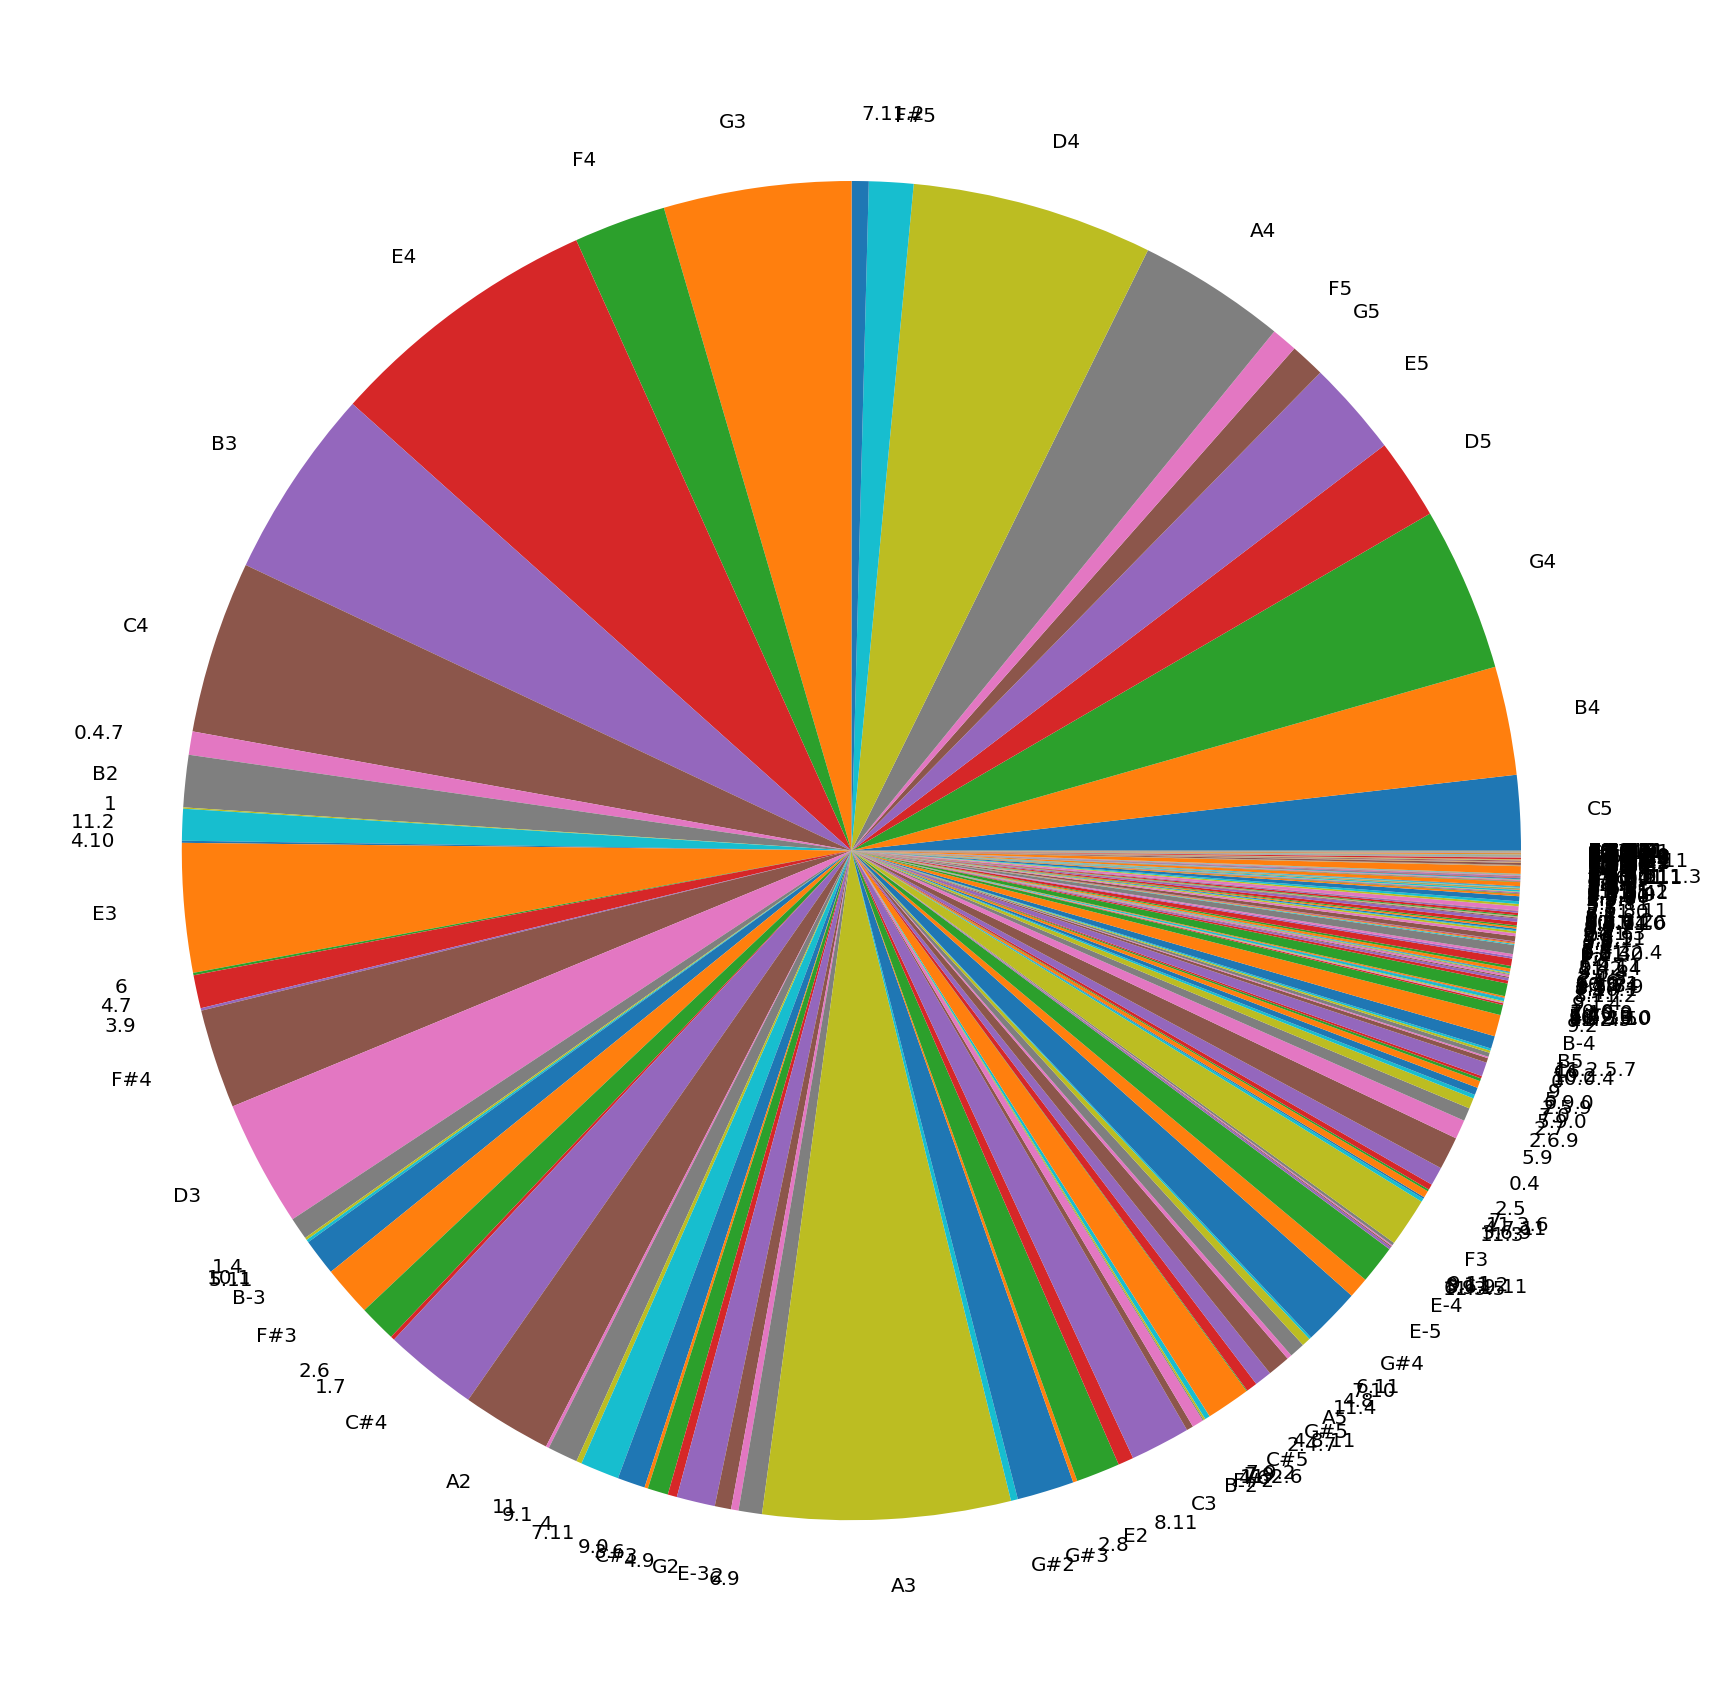

In [16]:
plt.figure(figsize = (15, 55))
plt.pie(notes_and_chords_no, labels=notes_and_chords)
plt.show()

## Krumhansl - Schmuckler Analysis

__How do listeners determine the key of a piece?__ <br> 
This question has been the subject of considerable attention in recent years. A number of computational models have been proposed, reflecting a variety of approaches. One important proposal has been the key-profile model of Krumhansl and Schmuckler. In this model, the distribution of pitch-classes in a piece is compared with an ideal distribution or “key-profile” for each key; the key whose profile best matches the pitch-class distribution of the piece is the preferred key.

In music theory, there are twenty-four keys in total twelve major and twelve minor. Since there are only twelve distinct pitches, each pitch has one associated major and one associated minor key. Two major and minor keys sharing the same tonic, or first scale note, are differentiated by the intervals between each following note in the scale. These intervals simply represent how many distinct pitches, if any, are skipped to find the next note in the scale. The scale intervals for all major keys (though not the specific notes themselves) are the same. Additionally, the same relationship holds for all minor keys as well, but with a different set of intervals than the majors. This is what gives major and minor keys their distinct tonal qualities.
These underlying conceptual relationships - both among the scale positions of a key and the keys themselves - are what many key-finding algorithms use to accurately compute key correlation.

Because it is possible to mathematically characterize sound waves and derivatively musical notes, it is possible to computationally analyze music in terms of concepts in music theory. This can take many forms, but the particular concepts in music theory  are those concerning musical key. Since music theory already relates keys to each other in logical and algorithmic ways, the prospect of using computers to analyze music for its key is appealing. To this end, much investigation has been made into methods of pitch detection and various bases for key detection.

Musical pieces are most commonly studied by analyzing their melodies and harmonies. In any such analysis, the first step is to determine the key. While the key is in principle determined by elements of music theory, individual pieces and passages can exhibit complex variations on these elements. 
Musical key analysis is the basis for many concepts in music theory by which music can be understood. The key of a piece of music is often associated with its tone, or the mood the piece evokes. A piece of music, especially in the classical genre, may change keys many times throughout its duration, each time evoking a new atmosphere and possibly tension, or bringing back an old context for completeness. Furthermore, the context set by a certain key can be intentionally broken by notes outside of the key, for the purpose of creating tension, providing novelty, or hinting at an upcoming key change. Analyzing these key changes provides essential insight into the flow of a piece of music and helps the categorization of certain types of music into different styles.

As there are many files, plotting graphs for each file is memory intensive. Therefore, we will draw graphs only for the first 10 files/streams.

In [17]:
streams = []
for song in song_list[:10]:
    stream = converter.parse(src_dir + song)
    streams.append(stream)

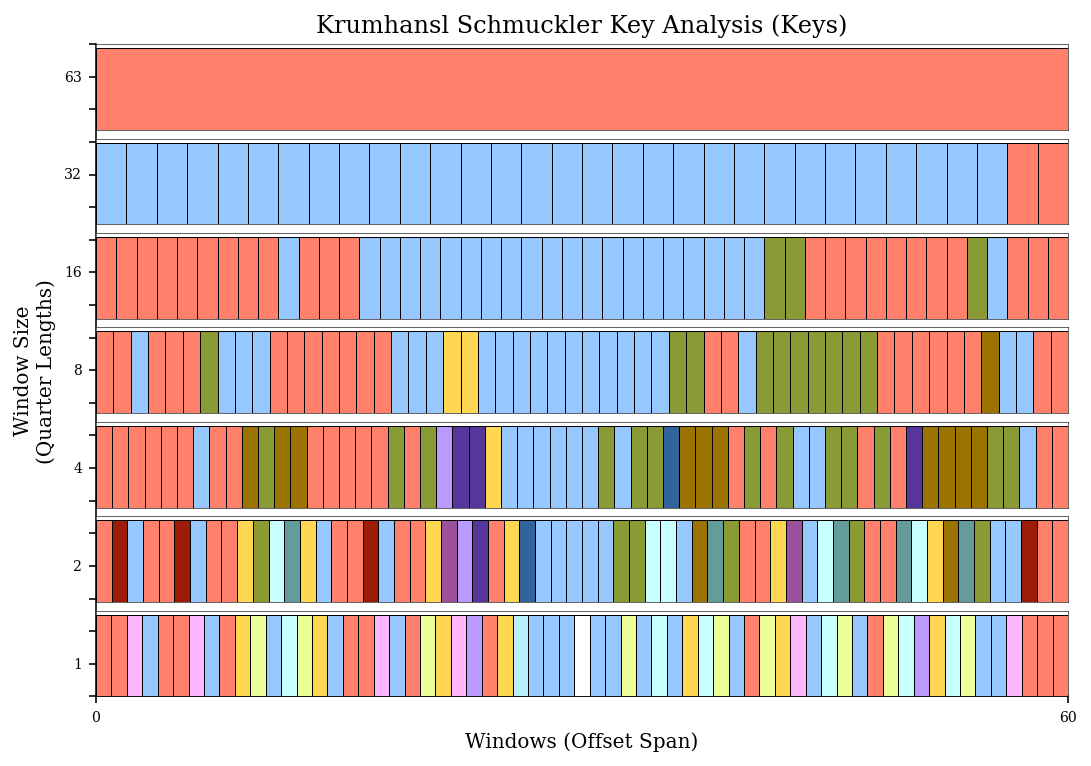

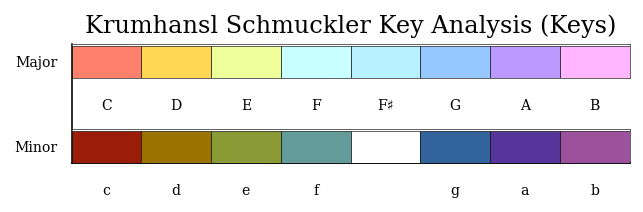

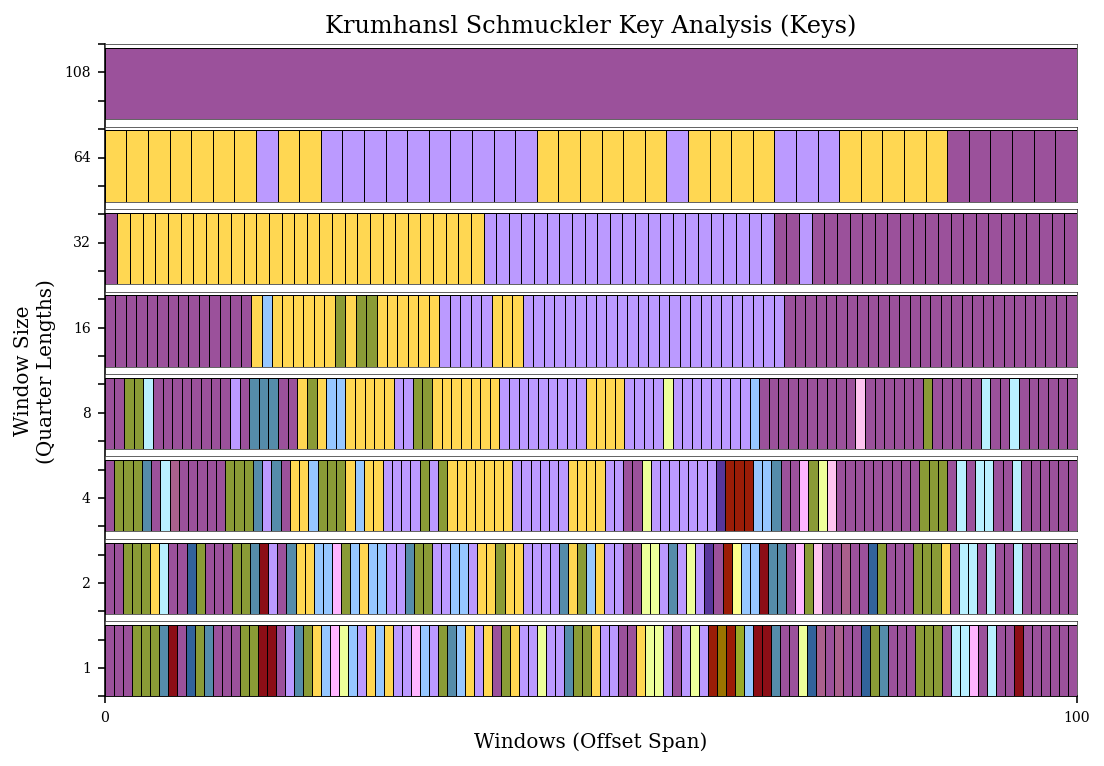

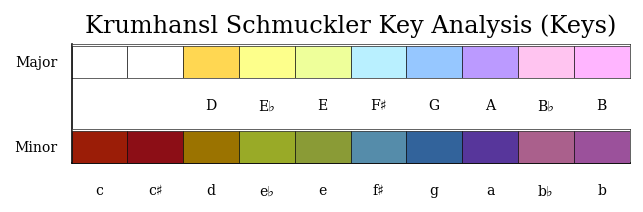

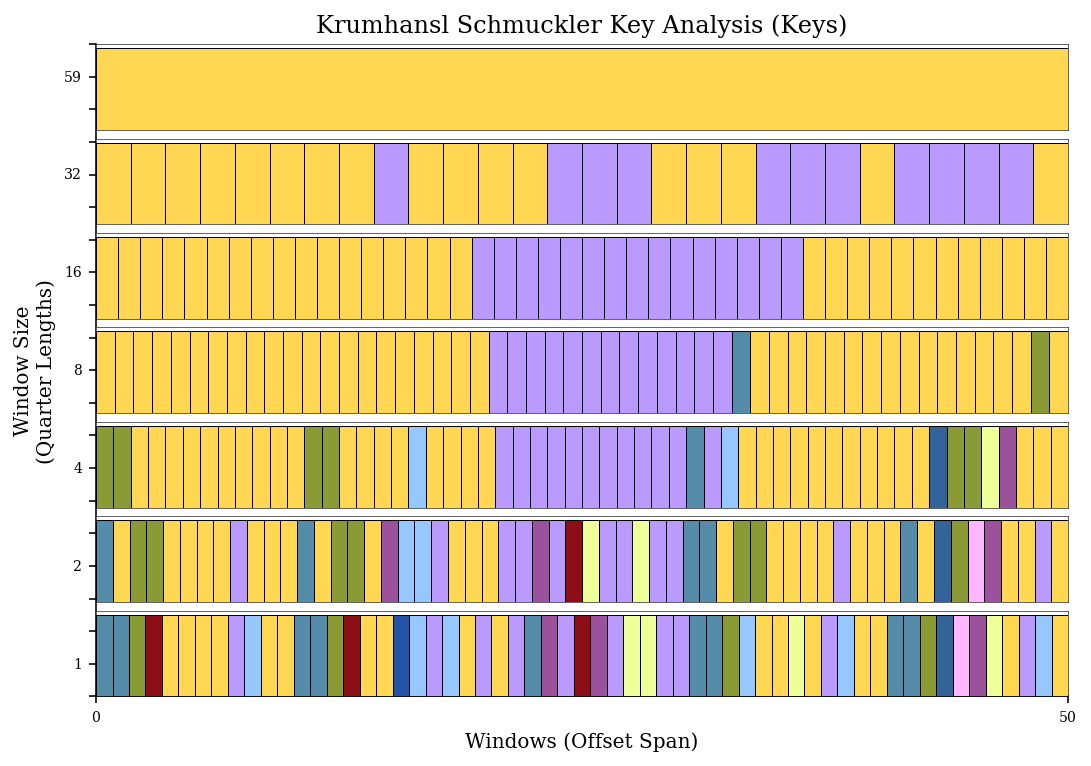

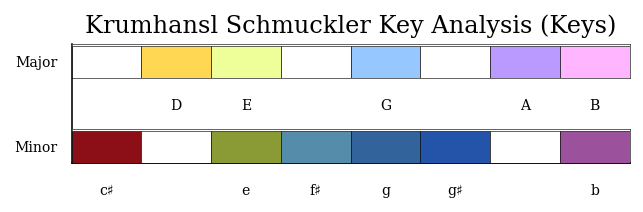

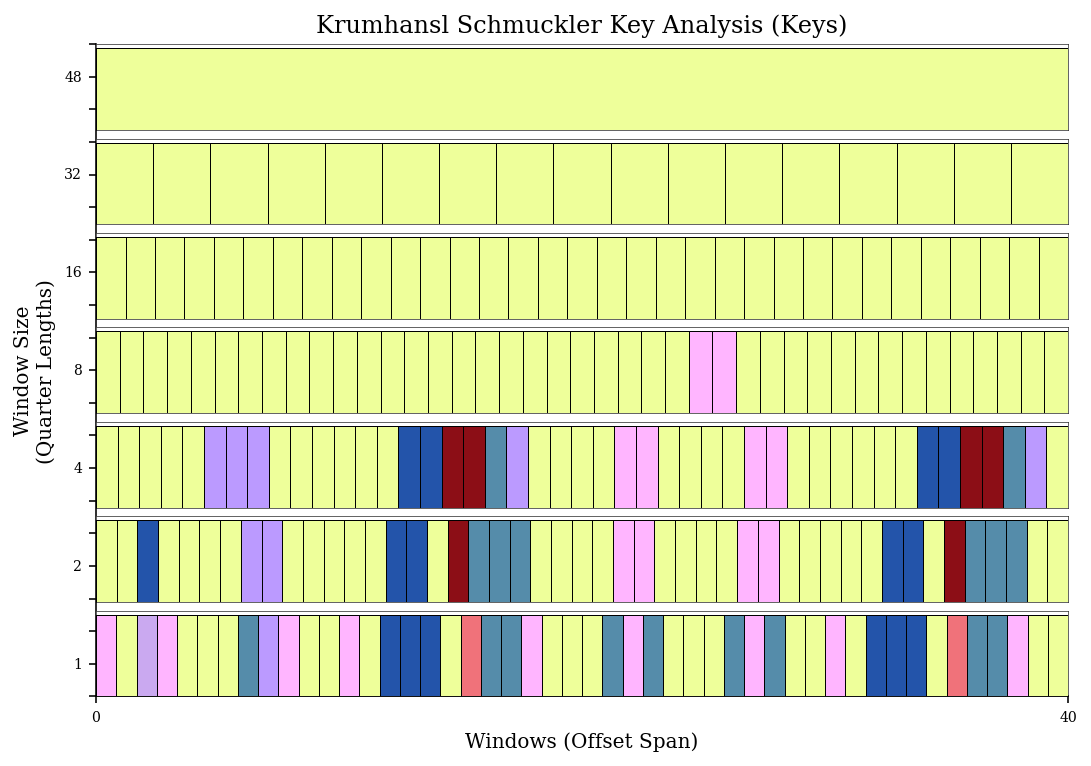

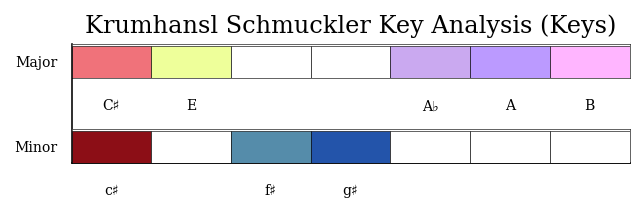

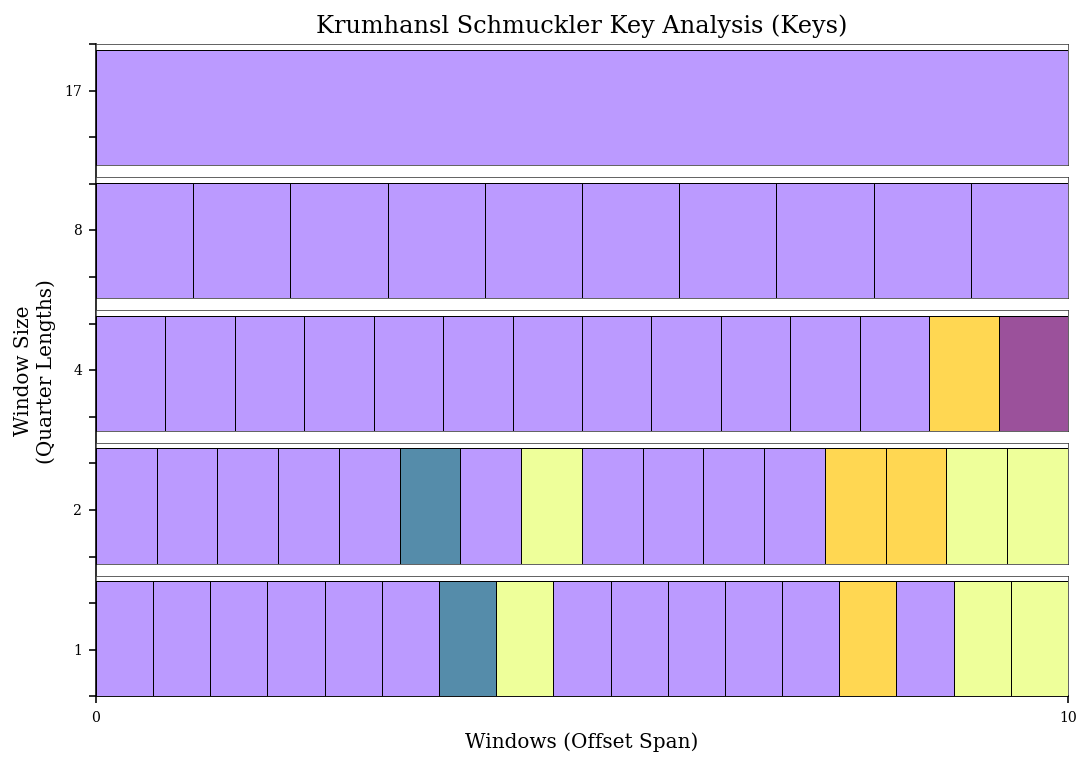

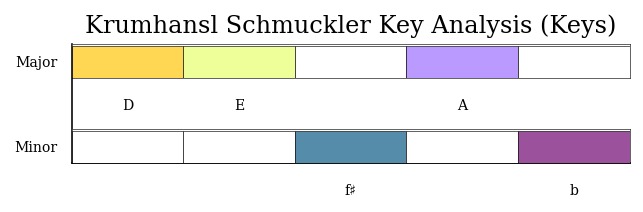

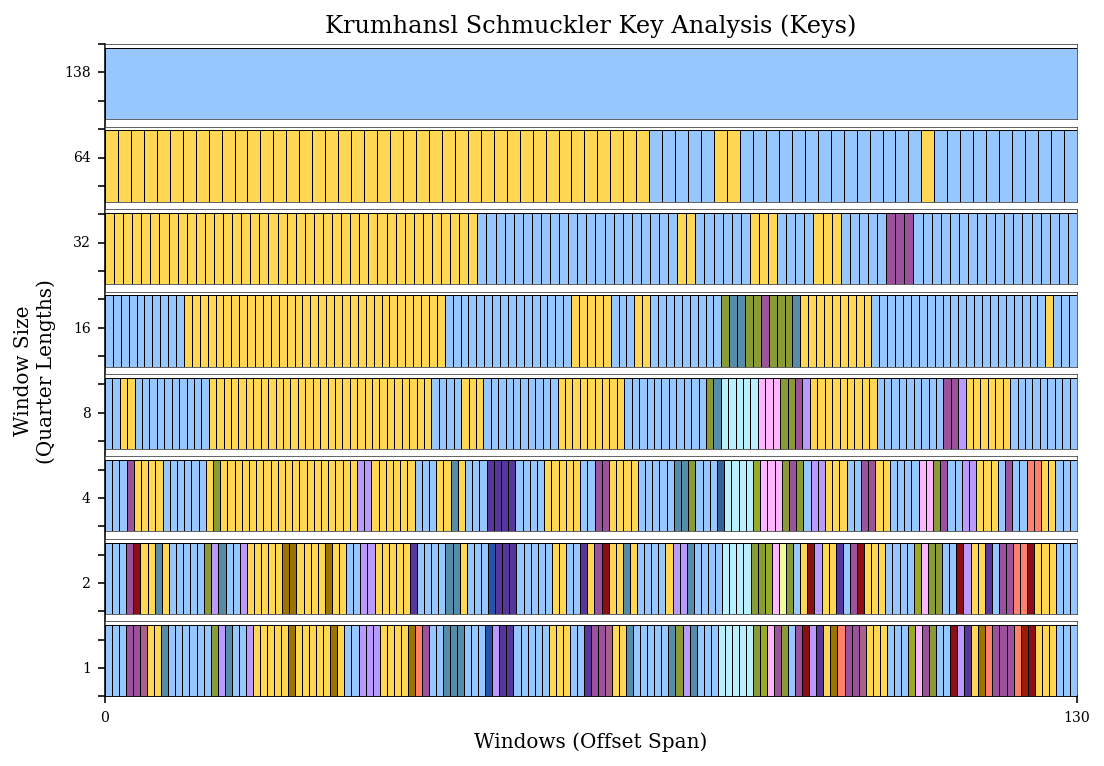

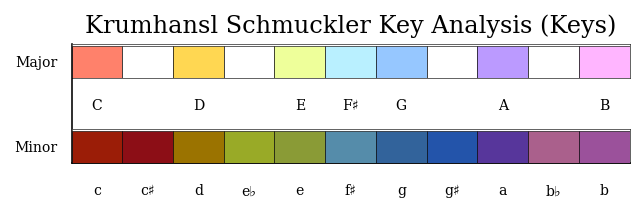

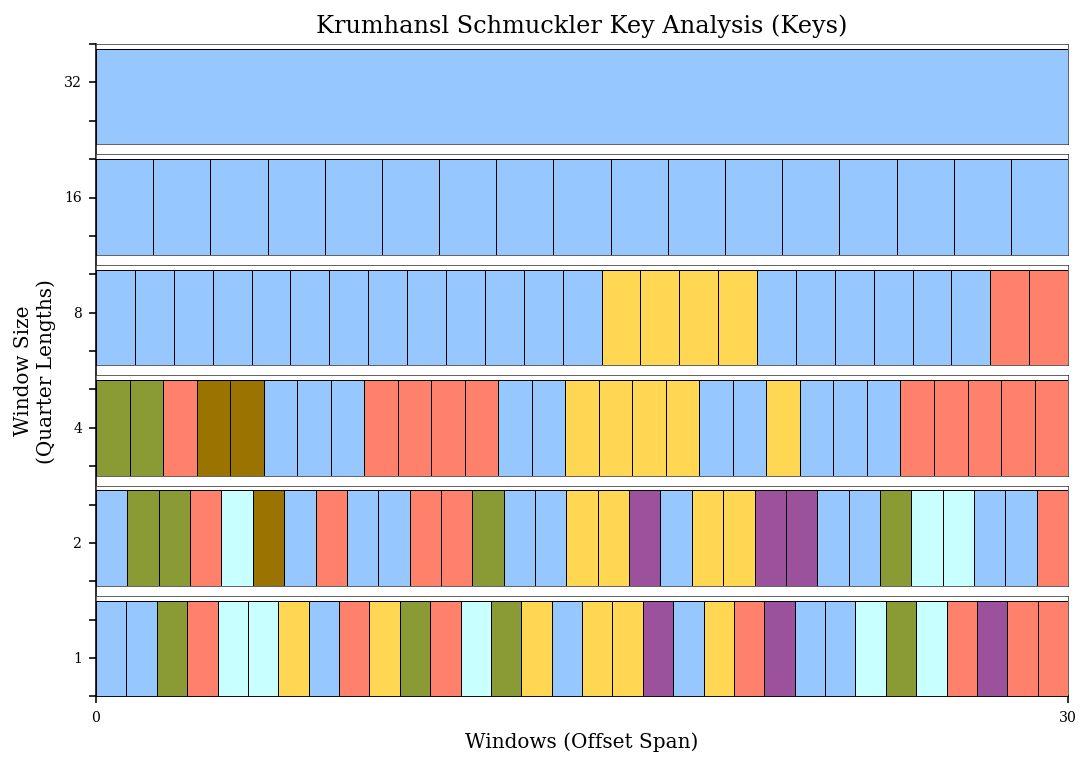

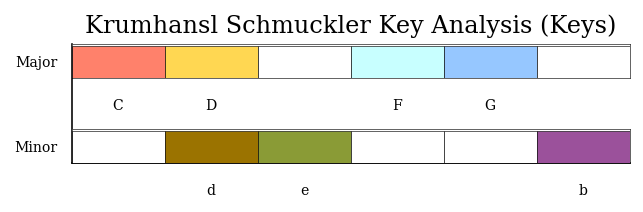

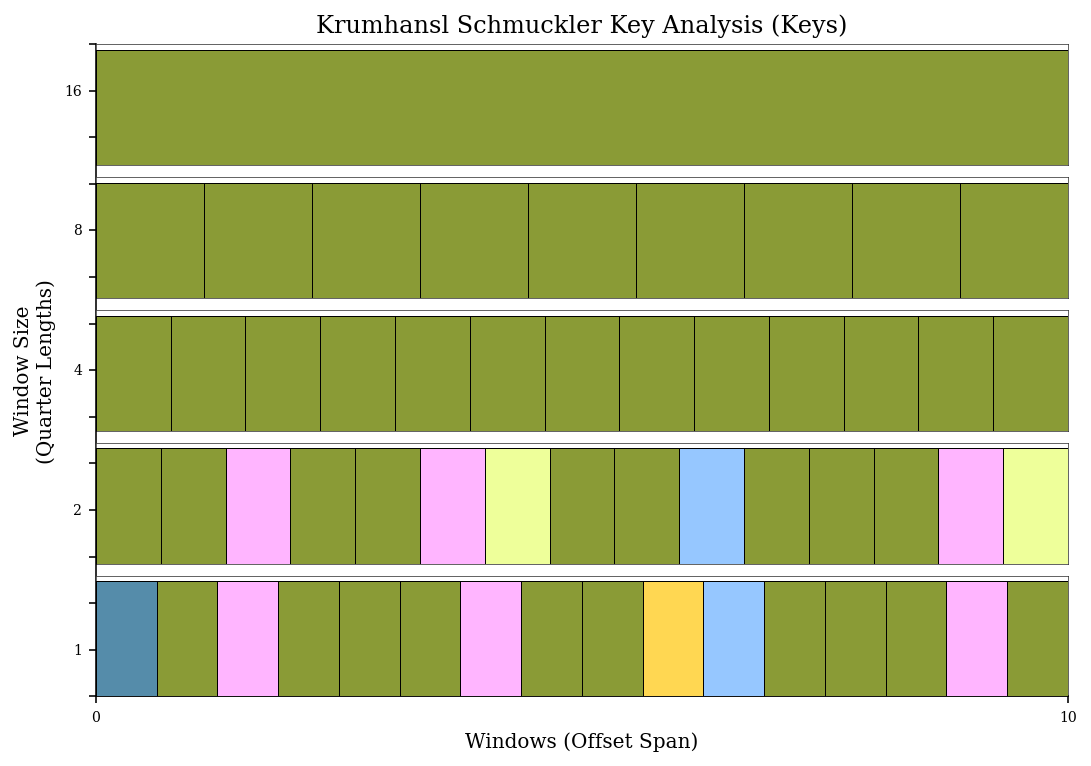

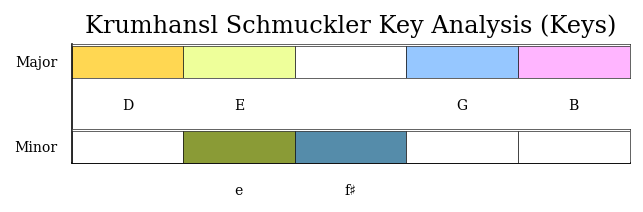

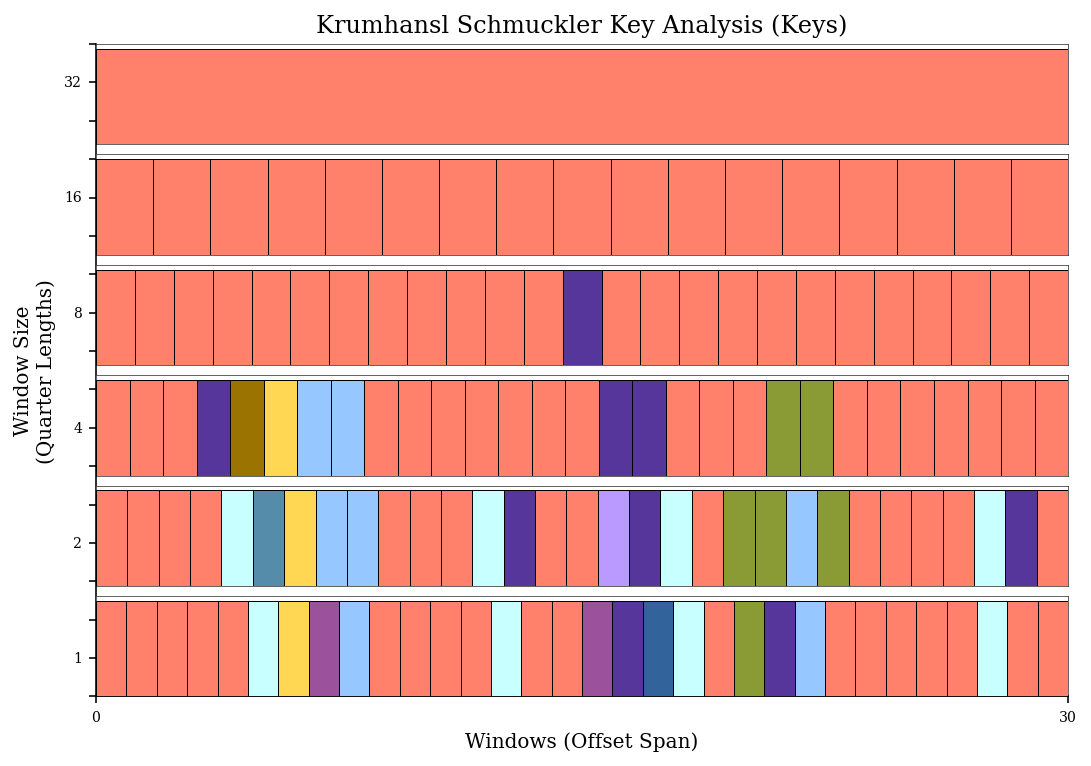

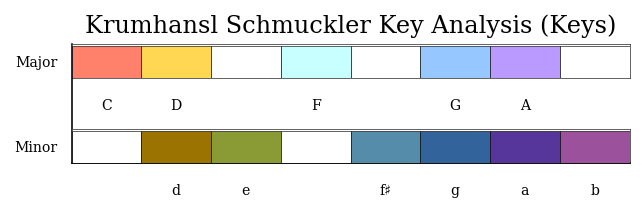

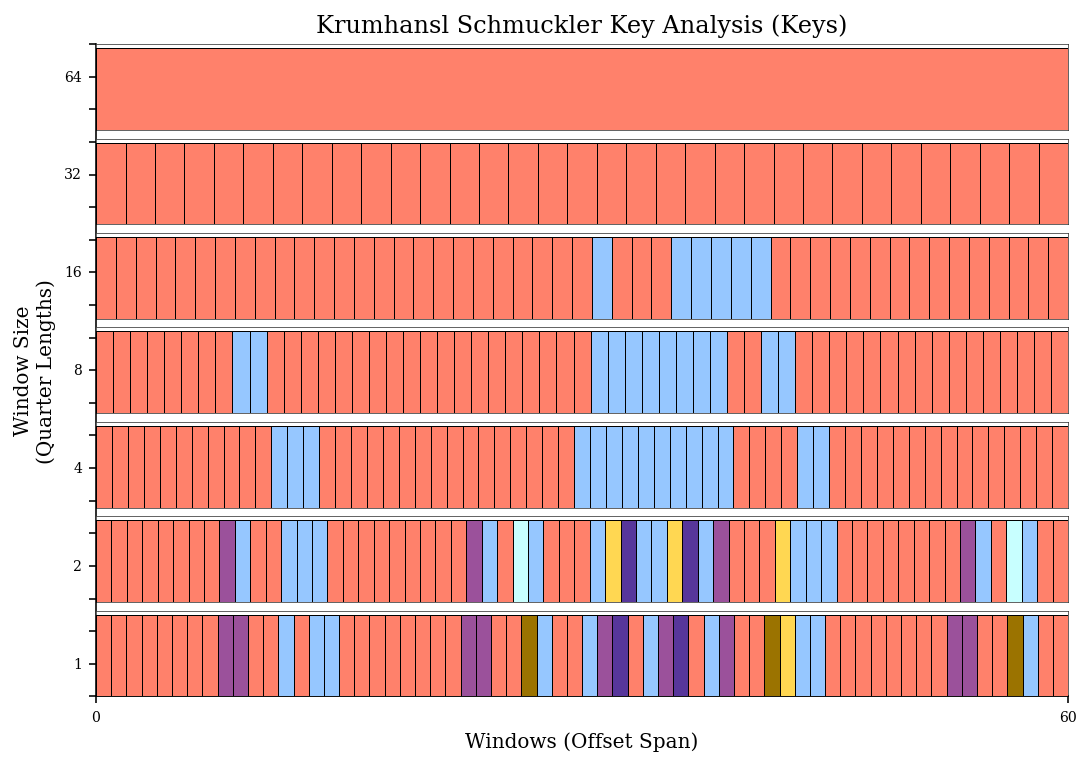

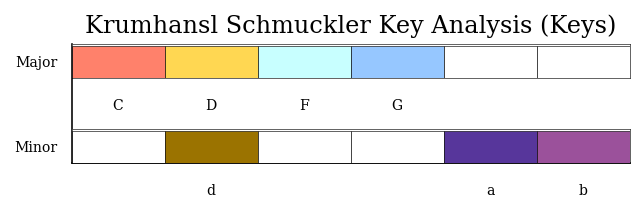

In [18]:
plots = [graph.plot.WindowedKey(stream.parts[0]) for stream in streams]
for plot in plots:
    plot.run()

As the KS analysis is based on pitch classes, we will show the distribution of pitch classes in the first 10 files/streams.

Let's remember, a __note__ is a symbolic representation of a sound. For our purposes, a note can be described by its pitch and duration. A note's __pitch__ is related to the frequency of oscillation of its sound wave, which is measured in hertz (Hz). Notes with higher pitches have sound waves with more oscillations per second.

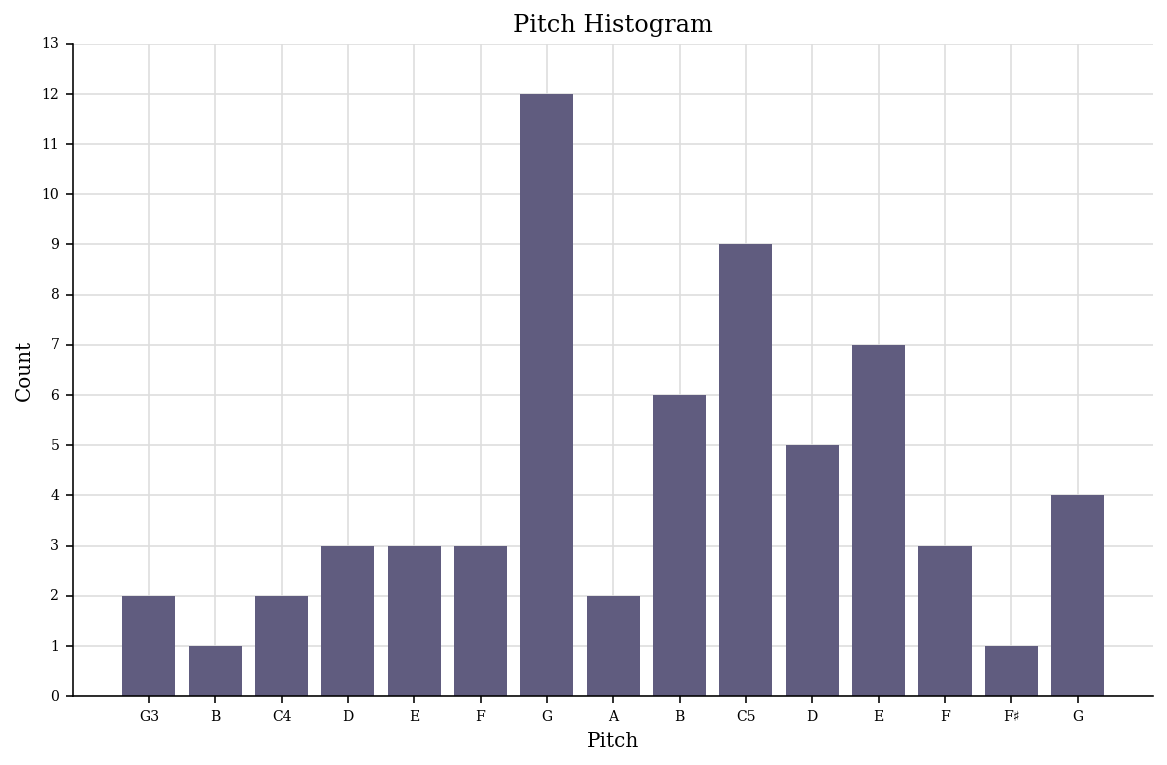

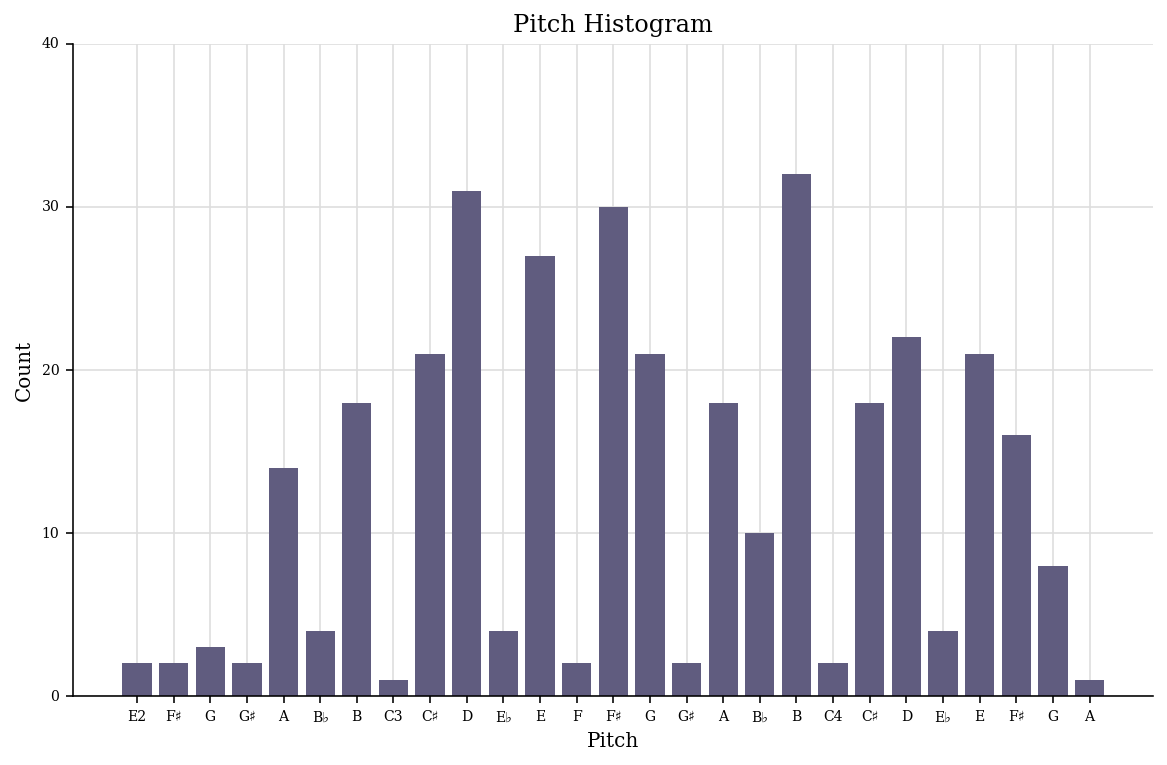

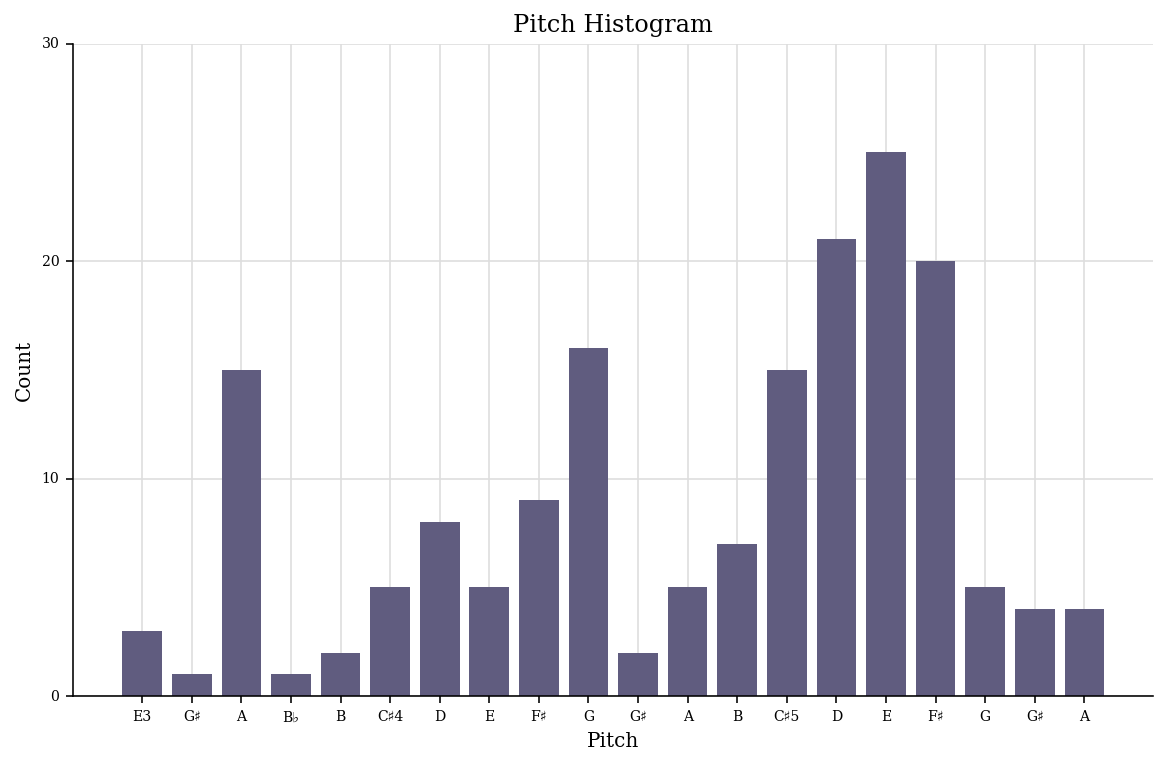

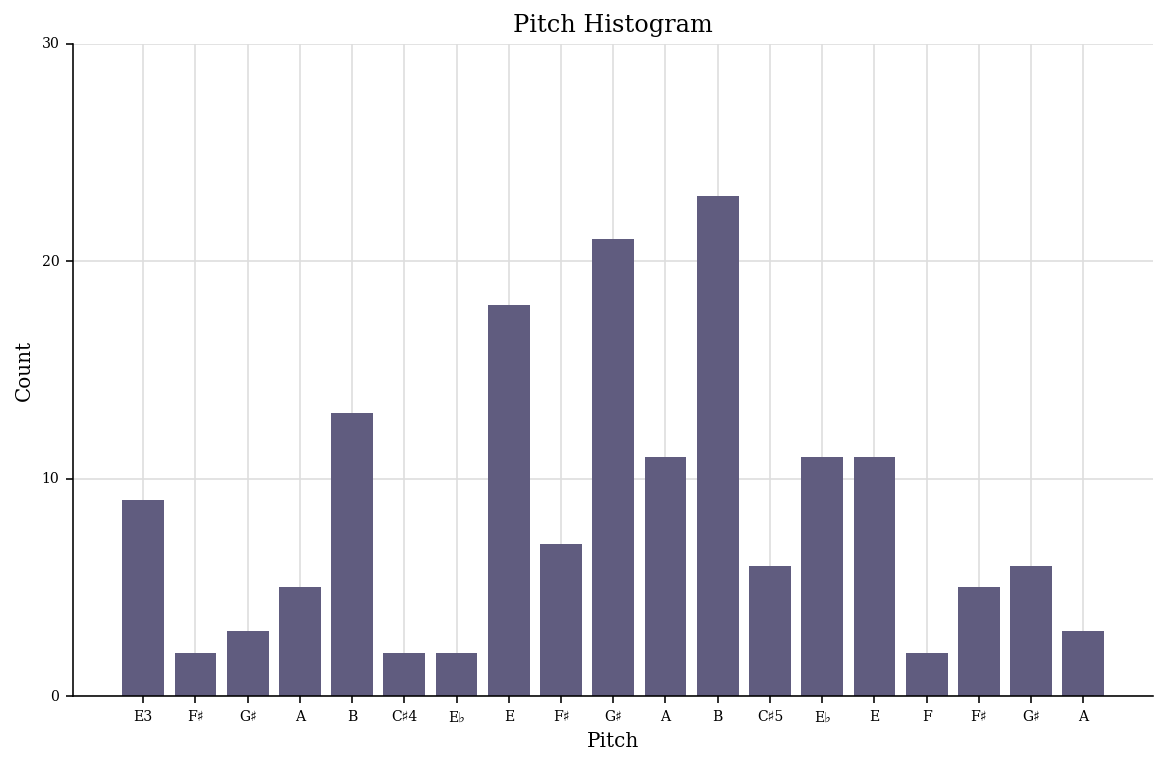

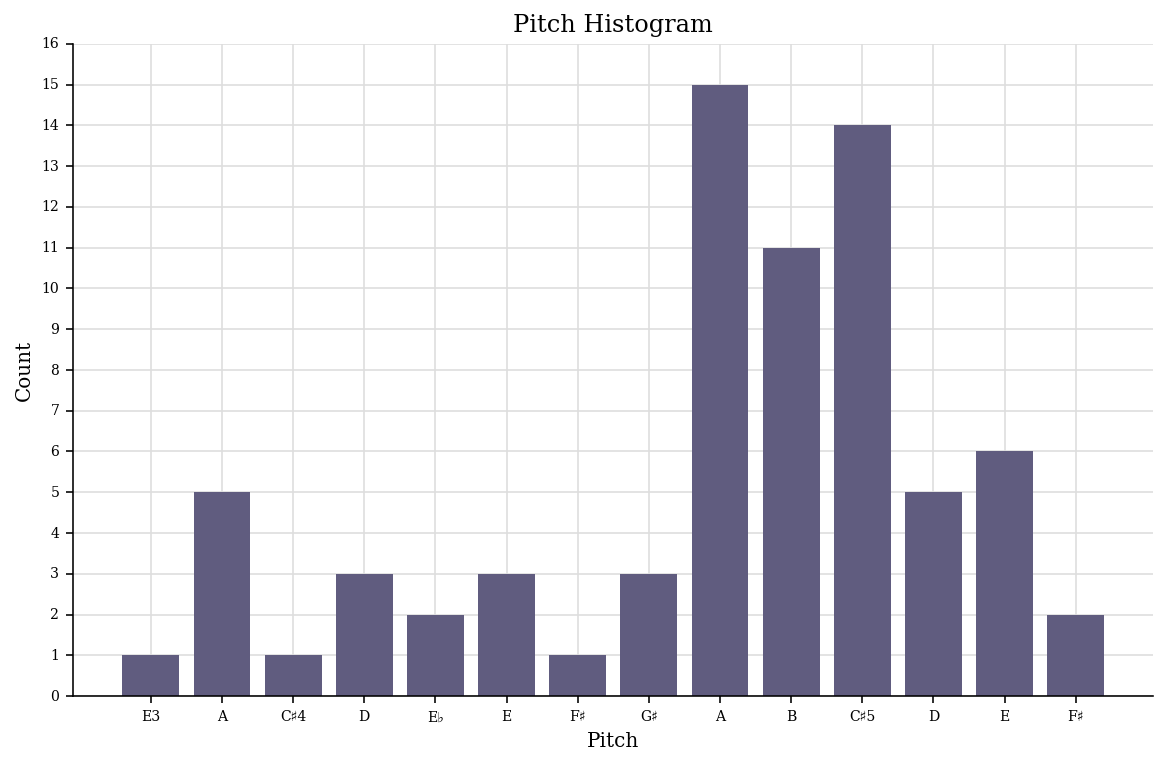

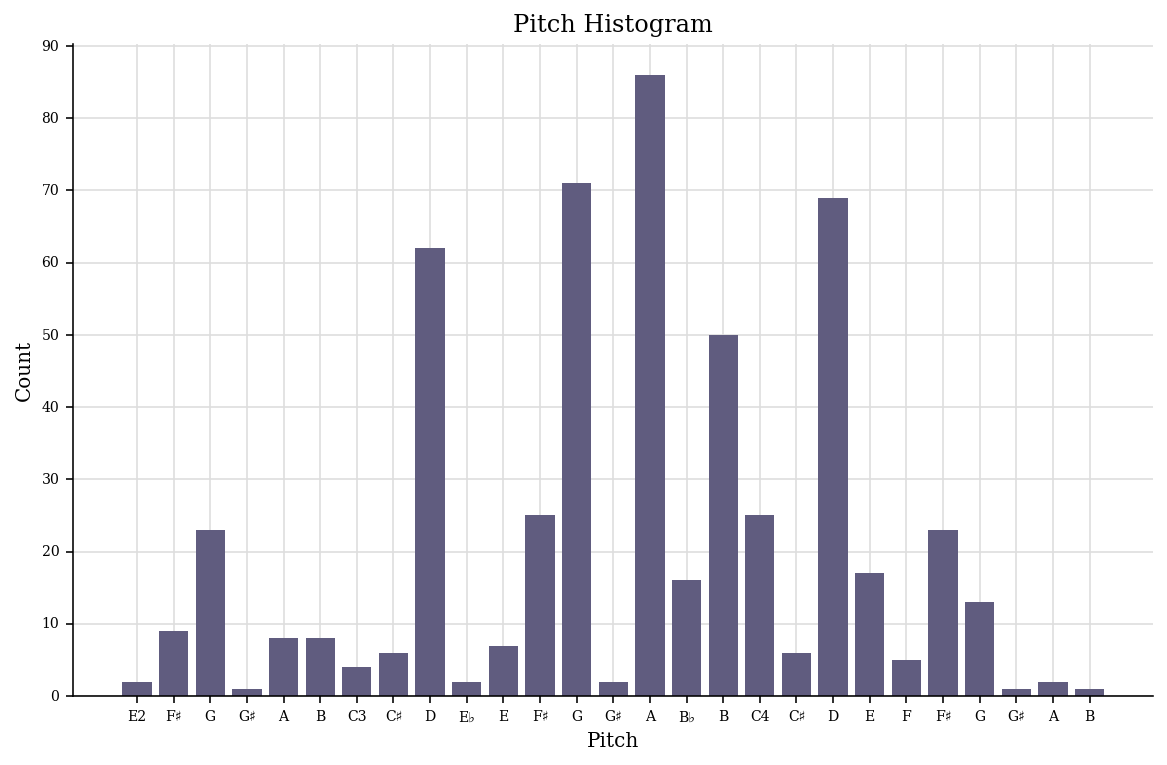

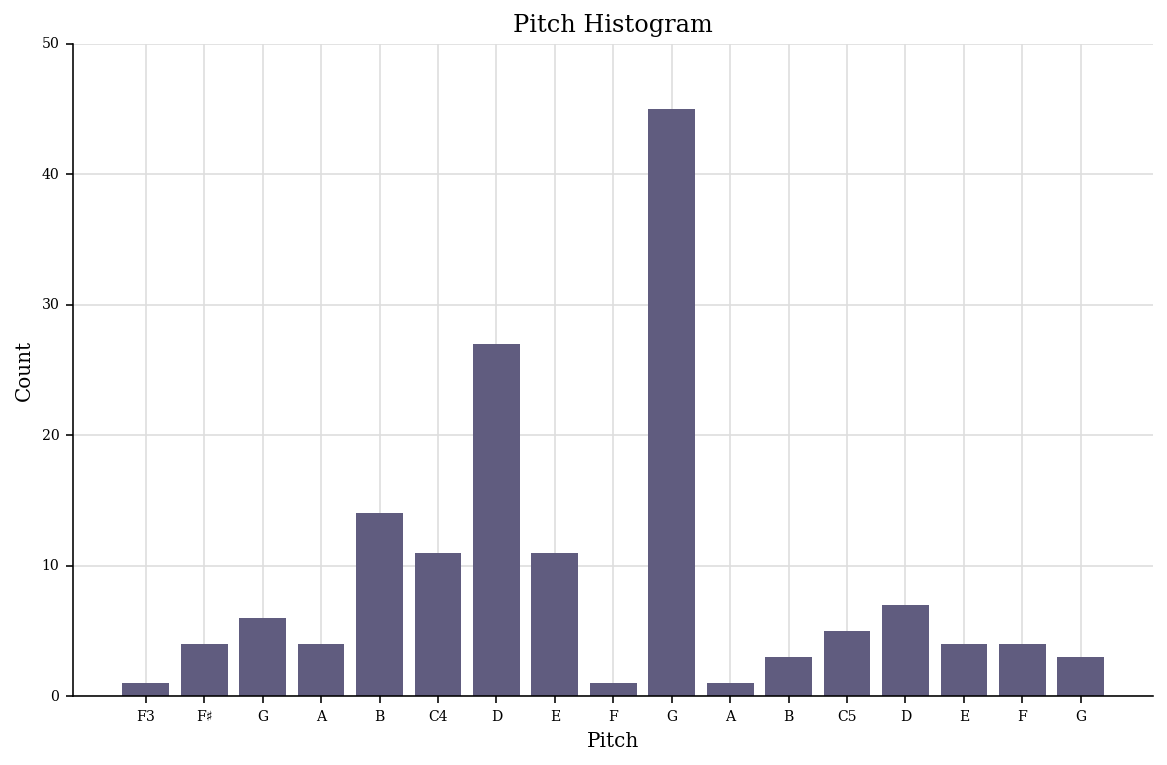

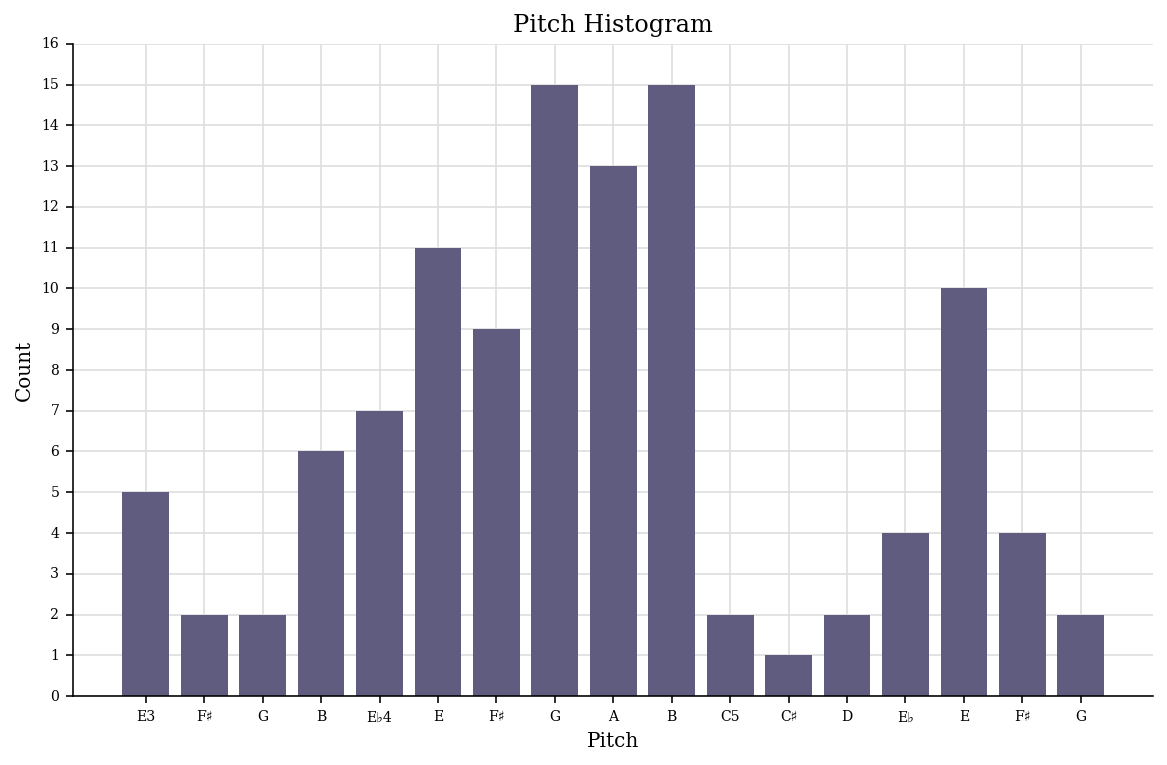

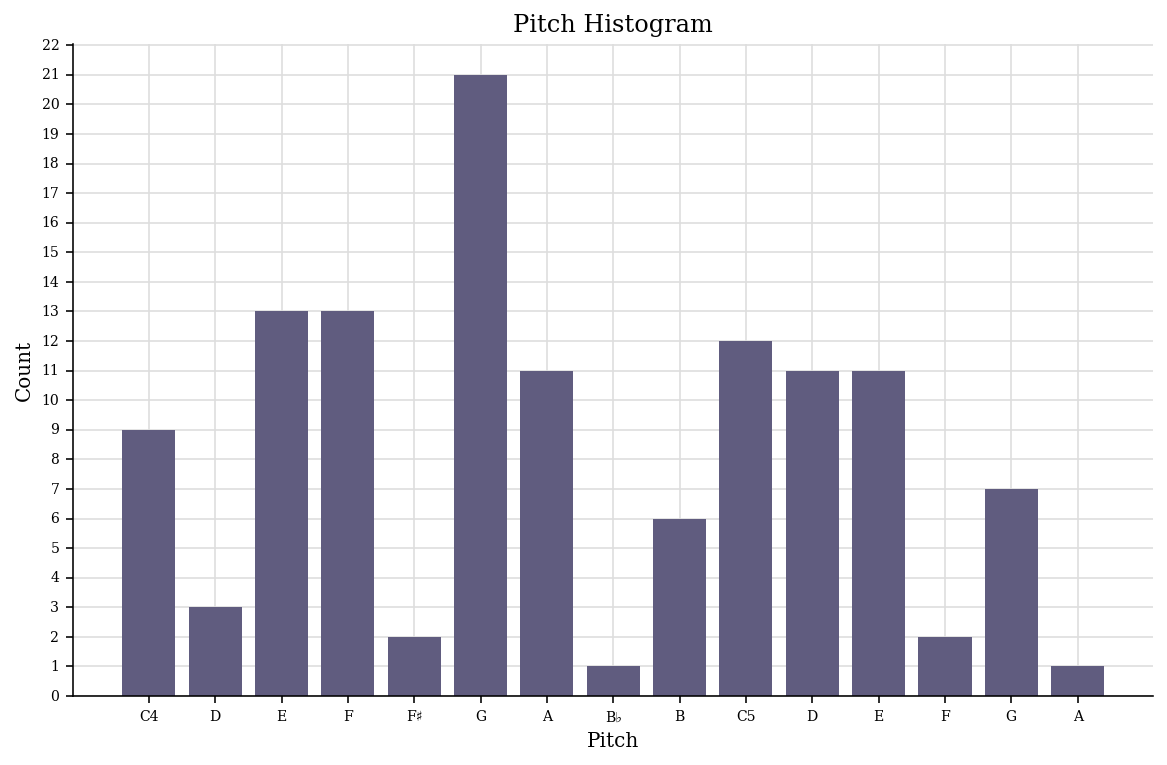

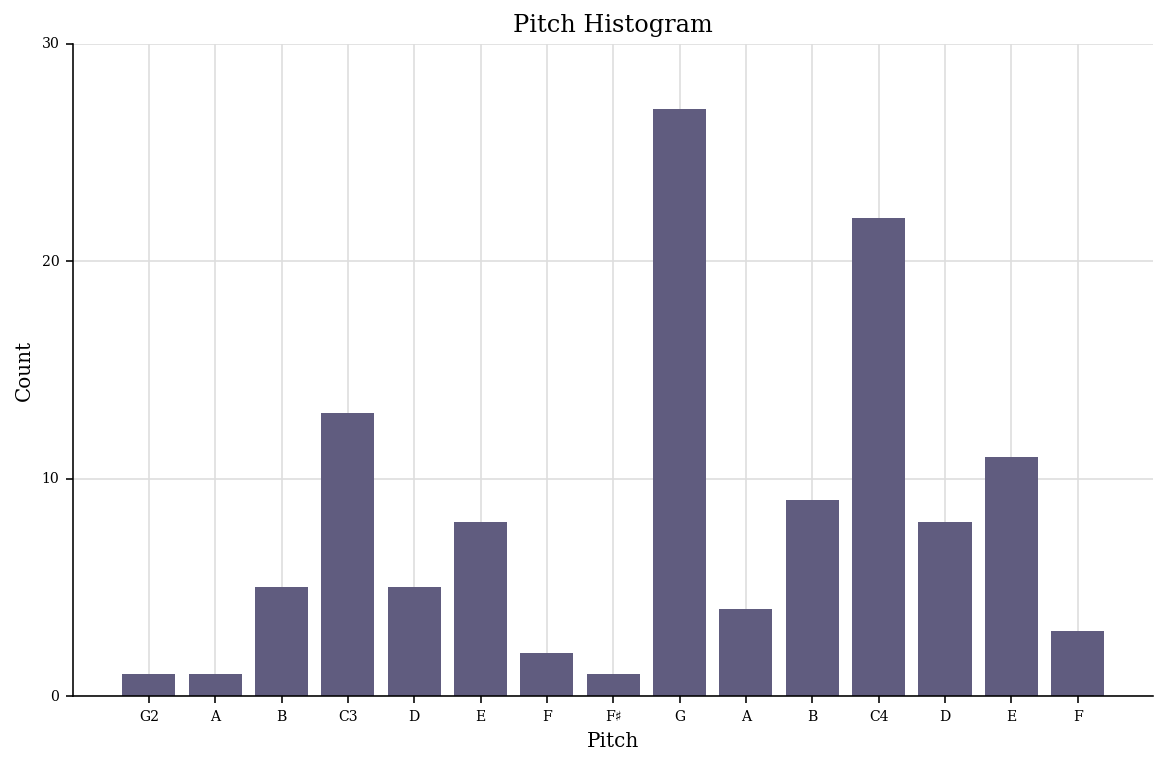

In [19]:
for stream in streams:
    p = graph.plot.HistogramPitchSpace(stream)
    p.run() # with defaults and proper configuration, will open graph

As the notes are described by pitch and duration, we will show histogram of duration for first 10 files/streams.

Duration represents a span of musical time measurable in terms of quarter notes (or in advanced usage other units). For instance, “57 quarter notes” or simply “quarter note.”

Music21 Durations use the common American duration types: “whole”, “half”, “quarter”, “eighth”, “16th”, “32nd”, “64th”. Note that for durations shorter than an eighth note, we use numbers instead of spelling out the whole name of the Duration type. Music21 also supports less commonly used types such as “breve” (2 whole notes), “longa” (4 whole notes), and “maxima” (8 whole notes) and on the other side, “128th”, “256th”, etc. down to “2048th” notes. (Some of these very long and very short notes can’t be displayed in many musical notation systems, but it’s good to know that we’re ready when they are).

The number on the x-axis represents how many quarter notes long it is. It is clear what the numbers on the y-axis represent.

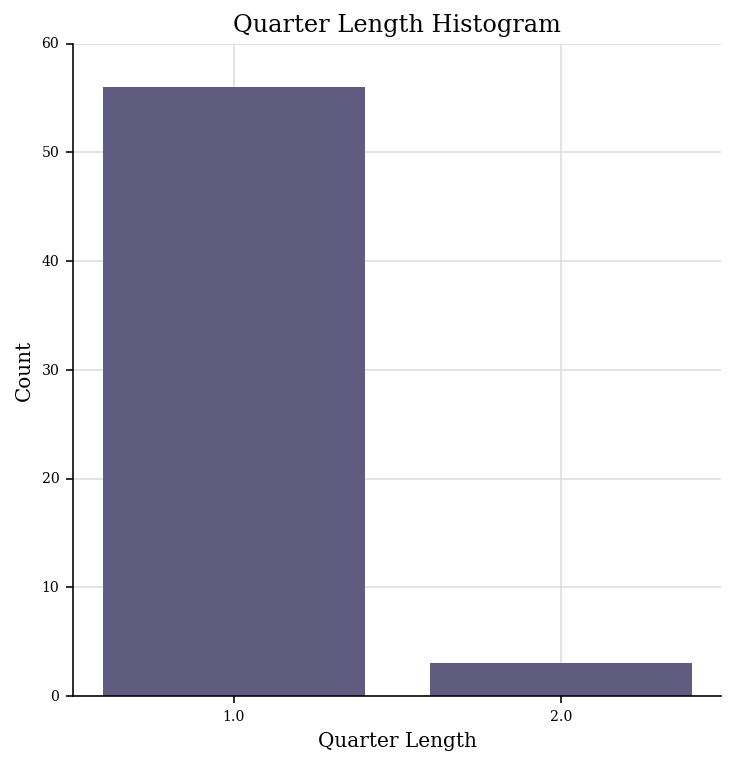

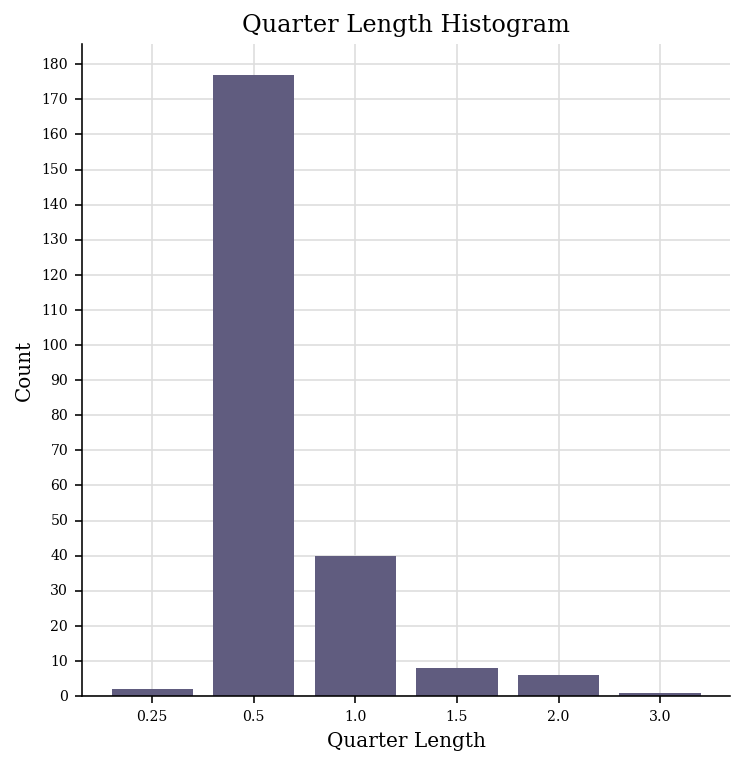

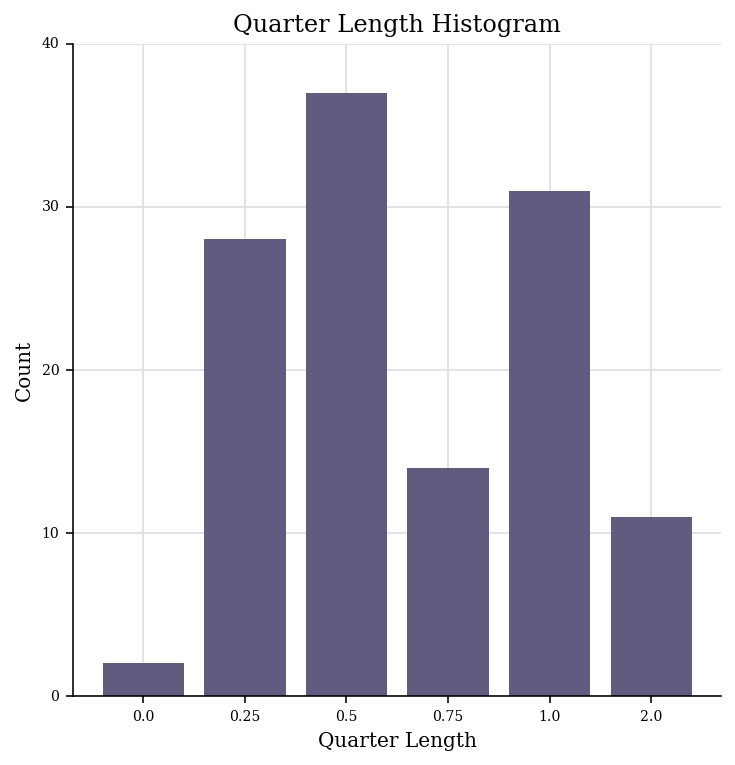

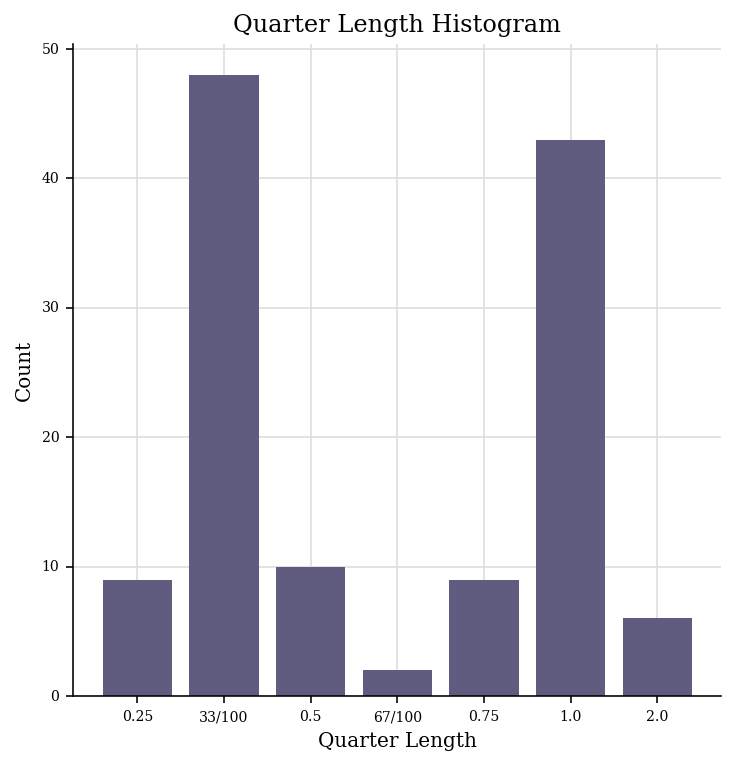

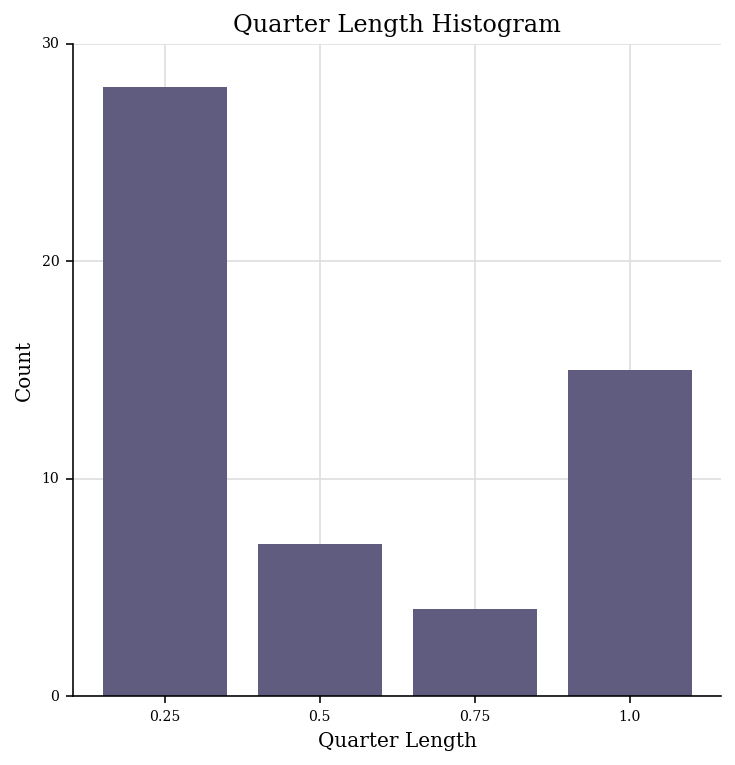

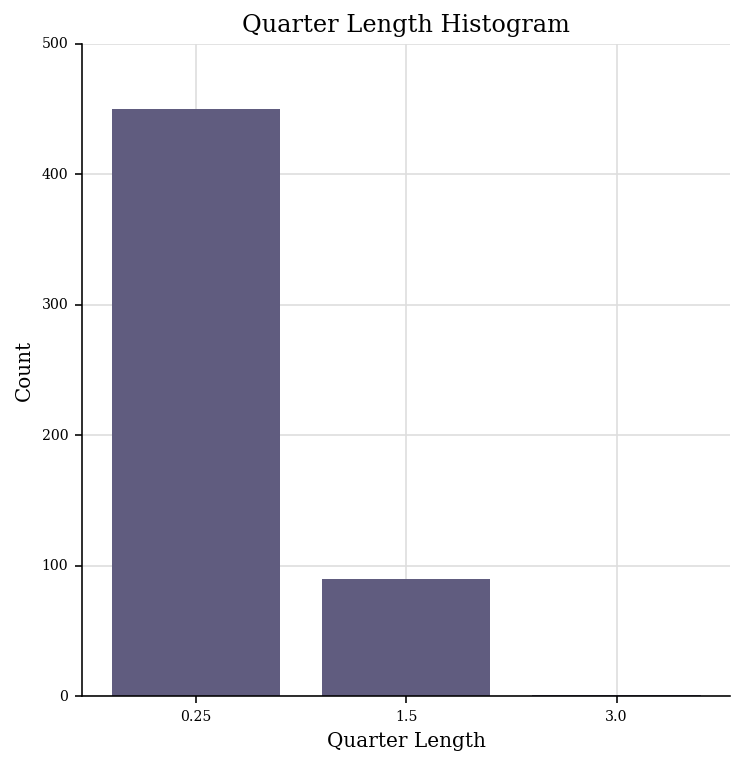

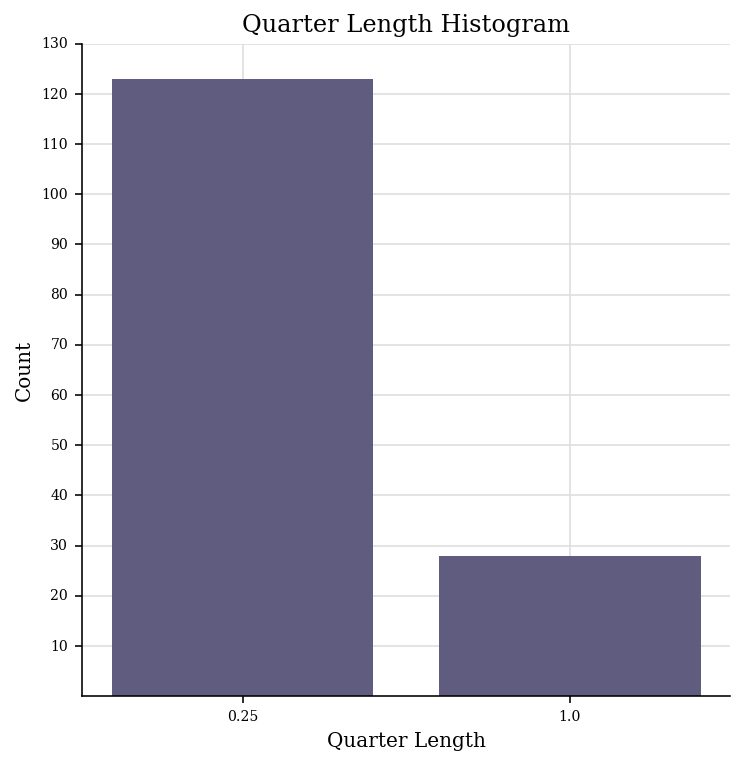

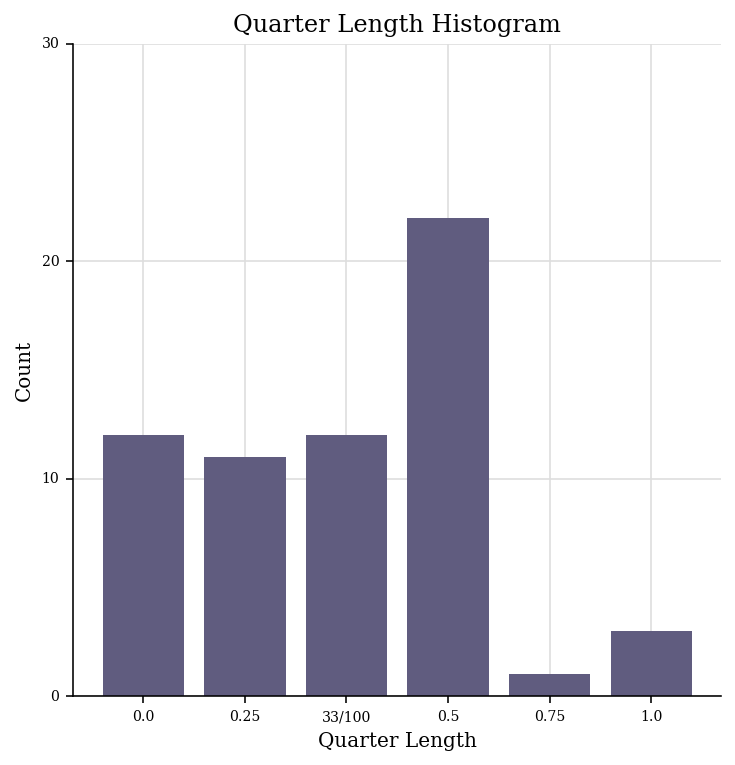

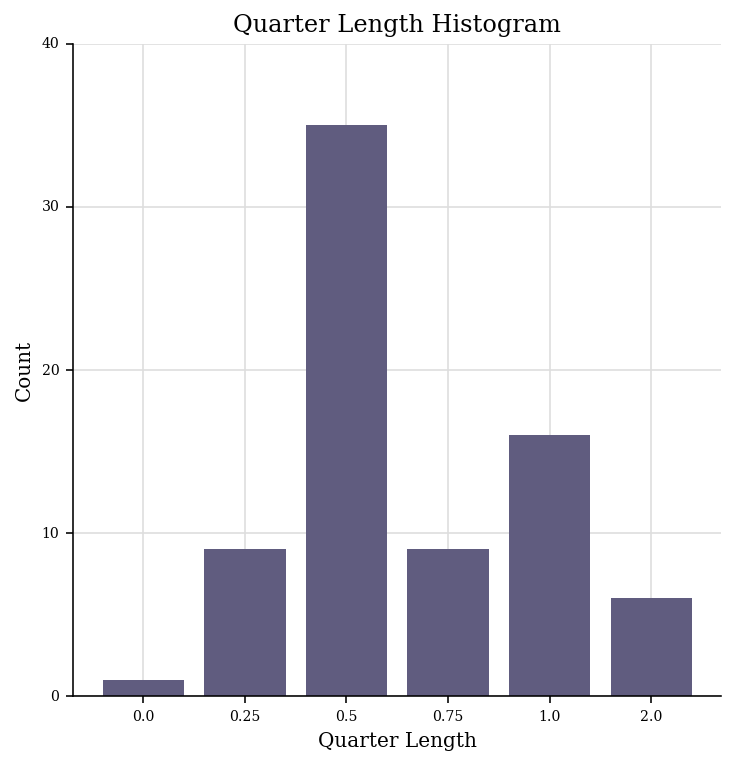

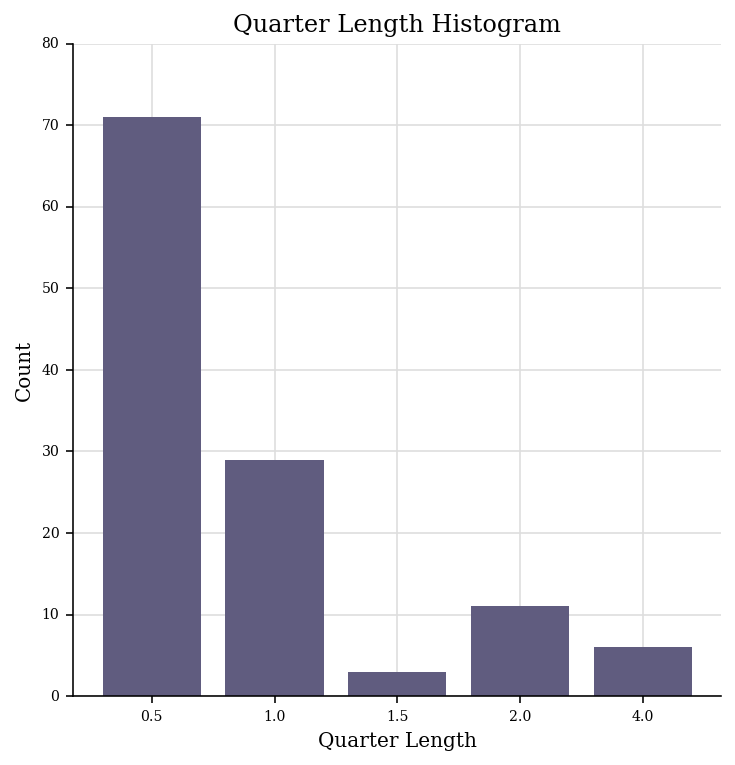

In [20]:
for stream in streams:
    p = graph.plot.HistogramQuarterLength(stream)
    p.run()